# Using a pretrained convnet

# Fine Tuning
### Thus the steps for fine-tuning a network are as follow:
###### 1 Add your custom network on top of an already-trained base network.
###### 2 Freeze the base network.
###### 3 Train the part you added.
###### 4 Unfreeze some layers in the base network.
###### 5 Jointly train both these layers and the part you added.

In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

Using TensorFlow backend.


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte chptrs 5 material/workingDirectory'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Unfreezed Conv2D top layer for Fine Tuning

In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# Freezing all layers up to a specific one

In [6]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Training the model end to end with a frozen convolutional base

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])

In [9]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 321s 3s/step - loss: 0.4856 - acc: 0.7550 - val_loss: 0.2421 - val_acc: 0.8740
Epoch 2/30
100/100 [==============================] - 345s 3s/step - loss: 0.3306 - acc: 0.8600 - val_loss: 0.3172 - val_acc: 0.8780
Epoch 3/30
100/100 [==============================] - 346s 3s/step - loss: 0.2912 - acc: 0.8710 - val_loss: 0.1706 - val_acc: 0.9260
Epoch 4/30
100/100 [==============================] - 336s 3s/step - loss: 0.2588 - acc: 0.8895 - val_loss: 0.0687 - val_acc: 0.9280
Epoch 5/30
100/100 [==============================] - 338s 3s/step - loss: 0.2427 - acc: 0.9060 - val_loss: 0.1709 - val_acc: 0.9260
Epoch 6/30
100/100 [==============================] - 338s 3s/step - loss: 0.2178 - acc: 0.9055 - val_loss: 0.1801 - val_acc: 0.9280
Epoch 7/30
100/100 [==============================] - 335s 3s/step - loss: 0.1947 - acc: 0.9135 - val_loss: 0.1967 - val_acc: 0.9340
Epoch 8/30
100/100 [==============================] - 349s 3s/step - 

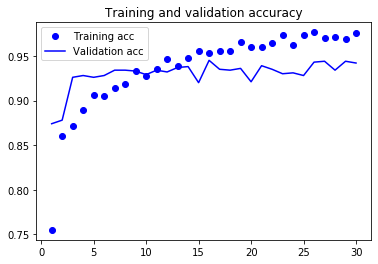

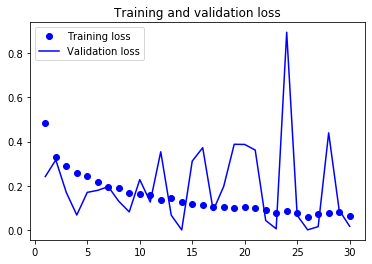

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model.save("Cat_N_Dog_FineTune.h5")